#Import Library

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split #percentage split
from sklearn.model_selection import cross_val_score, cross_val_predict #k-fold cross validation

#Import Dataset & Exploration

In [ ]:
#Upload File CSV

from google.colab import files
files.upload()

Saving survey lung cancer4.csv to survey lung cancer4.csv


{'survey lung cancer4.csv': b'AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE ,ALLERGY ,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER\r\n69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES\r\n74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES\r\n59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO\r\n63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO\r\n63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO\r\n75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES\r\n52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES\r\n51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES\r\n68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO\r\n53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES\r\n61,2,2,2,2,2,2,1,2,1,2,2,2,1,YES\r\n72,1,1,1,1,2,2,2,2,2,2,2,1,2,YES\r\n60,2,1,1,1,1,2,1,1,1,1,2,1,1,NO\r\n58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES\r\n69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO\r\n48,1,2,2,2,2,2,2,2,1,2,2,2,1,YES\r\n75,2,1,1,1,2,1,2,2,2,2,2,1,2,YES\r\n57,2,2,2,2,2,1,1,1,2,1,1,2,2,YES\r\n68,2,2,2,2,2,2,1,1,1,2,2,1,1,YES\r\n61,1,1,1,1,2,2,1,1,1,1,2,1,1,NO\r\n44,2,2,2,2,2,2,1,1,1,1,2,2,1,YES\r\n64,1,2,2,2,1,1,2,2,1,2,1,2,1,YES\r

In [ ]:
#Membaca dataset csv
df = pd.read_csv('survey lung cancer4.csv')

In [ ]:
#Cetak isi dataset csv
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
df.shape
#Hasilnya (jumlah data, jumlah features) atau (jumlah baris, jumlah kolom)

(309, 15)

In [ ]:
#Membaca 5 data teratas
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#Membaca 5 data terbawah
df.tail()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


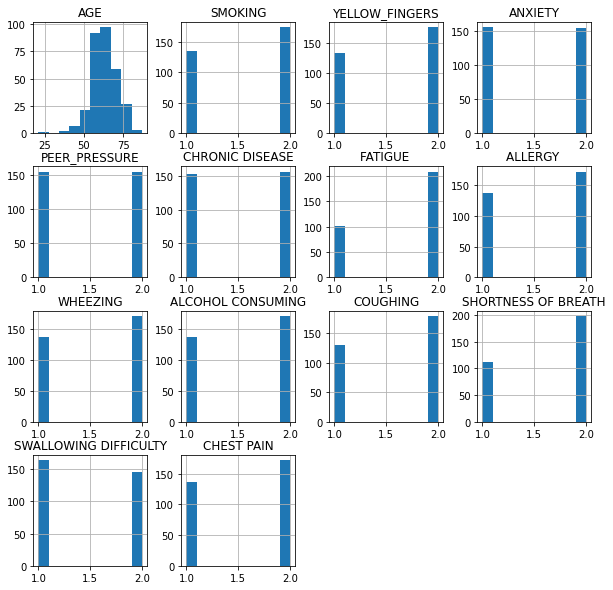

In [ ]:
#Visualisasi dari tiap variabel data
df.hist(bins=10, figsize=(10,10))
plt.show()

#Normalisasi Data

In [ ]:
data = df.drop(columns=['LUNG_CANCER'])
df_norm = (data-data.min())/ (data.max() - data.min())
df_norm

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.530303,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
305,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
306,0.560606,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
307,0.696970,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
df_norm['LUNG_CANCER'] = df['LUNG_CANCER']
#cleanup_nums = {"Target":     {"NF": 0, "F": 1} } #ubah data kategorik jadi numerik
#df2 = df2.replace(cleanup_nums)
df_norm

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,YES
1,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,YES
2,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NO
3,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NO
4,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.530303,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,YES
305,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,YES
306,0.560606,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,YES
307,0.696970,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,YES


In [ ]:
X = df_norm.drop(columns=['LUNG_CANCER'])
y = df_norm['LUNG_CANCER']

#Preprocessing

In [ ]:
#Mengecek apa ada missing value atau noise
df_norm.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#Melihat tipe data yang digunakan dari masing-masing variabel pada dataset
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    309 non-null    float64
 1   SMOKING                309 non-null    float64
 2   YELLOW_FINGERS         309 non-null    float64
 3   ANXIETY                309 non-null    float64
 4   PEER_PRESSURE          309 non-null    float64
 5   CHRONIC DISEASE        309 non-null    float64
 6   FATIGUE                309 non-null    float64
 7   ALLERGY                309 non-null    float64
 8   WHEEZING               309 non-null    float64
 9   ALCOHOL CONSUMING      309 non-null    float64
 10  COUGHING               309 non-null    float64
 11  SHORTNESS OF BREATH    309 non-null    float64
 12  SWALLOWING DIFFICULTY  309 non-null    float64
 13  CHEST PAIN             309 non-null    float64
 14  LUNG_CANCER            309 non-null    object 
dtypes: flo

#Split Dataset

##Percentage Split

In [ ]:
#Membagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#test_size=0.2 artinya 80% data training dan 20% data testing

In [ ]:
#Melihat ukuran X_train
X_train.shape

(247, 14)

In [ ]:
#Melihat ukuran X_test
X_test.shape

(62, 14)

In [ ]:
#Melihat ukuran y_train
y_train.shape

(247,)

In [ ]:
#Melihat ukuran y_test
y_test.shape

(62,)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((247, 14), (62, 14), (247,), (62,))

# Model & Prediction (SVM)

##Percentage Split

In [ ]:
#Import Library
from sklearn.svm import SVC

In [ ]:
#Aktivasi fungsi classifier SVM
svm = SVC(kernel='poly')

In [ ]:
#Memasukkan data training pada fungsi klasifikasi SVM
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
#Menentukan prediksi
y_predictsvm = svm.predict(X_test)
y_predictsvm

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO'], dtype=object)

In [ ]:
y_test

118    YES
250    YES
258    YES
56     YES
232    YES
      ... 
280     NO
36     YES
266     NO
225    YES
215     NO
Name: LUNG_CANCER, Length: 62, dtype: object

##K-Fold Cross Validation

In [ ]:
svm2 = SVC(kernel='poly')

In [ ]:
svmscore = cross_val_score(svm2, X, y, scoring='accuracy', cv=10)

In [ ]:
svmscore

array([0.87096774, 0.93548387, 0.87096774, 0.83870968, 0.90322581,
       1.        , 0.83870968, 0.93548387, 0.93548387, 0.93333333])

In [ ]:
y_predictsvm2 = cross_val_predict(svm2, X, y, cv=10)

In [ ]:
y_predictsvm2

array(['YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
    

#Evaluation (SVM)

##Percentage Split

In [ ]:
#Menghitung akurasi model SVM
print(accuracy_score(y_test, y_predictsvm))

0.9516129032258065


In [ ]:
#Membuat confusion matrix
confusion_matrix(y_test, y_predictsvm)

array([[ 4,  2],
       [ 1, 55]])

In [ ]:
#Membuat classification report
print(classification_report(y_test, y_predictsvm))

              precision    recall  f1-score   support

          NO       0.80      0.67      0.73         6
         YES       0.96      0.98      0.97        56

    accuracy                           0.95        62
   macro avg       0.88      0.82      0.85        62
weighted avg       0.95      0.95      0.95        62



##K-Fold Cross Validation

In [ ]:
#Menghitung akurasi model SVM
print(accuracy_score(y, y_predictsvm2))

0.9061488673139159


In [ ]:
#Membuat confusion matrix
confusion_matrix(y, y_predictsvm2)

array([[ 27,  12],
       [ 17, 253]])

In [ ]:
print(classification_report(y, y_predictsvm2))

              precision    recall  f1-score   support

          NO       0.61      0.69      0.65        39
         YES       0.95      0.94      0.95       270

    accuracy                           0.91       309
   macro avg       0.78      0.81      0.80       309
weighted avg       0.91      0.91      0.91       309



#Model & Prediction (KNN)

##Percentage Split

In [ ]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Aktivasi fungsi classifier KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Memasukkan data training pada fungsi klasifikasi KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Menentukan prediksi
y_predictknn = knn.predict(X_test)
y_predictknn

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO'], dtype=object)

##K-Fold Cross Validation

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knnscore = cross_val_score(knn2, X, y, scoring='accuracy', cv=10)

In [ ]:
knnscore

array([0.90322581, 0.93548387, 0.87096774, 0.87096774, 0.93548387,
       0.96774194, 0.87096774, 0.83870968, 0.93548387, 0.93333333])

In [ ]:
y_predictknn2 = cross_val_predict(knn2, X, y, cv=10)

In [ ]:
y_predictknn2

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO'

#Evaluation (KNN)

##Percentage Split

In [ ]:
#Menghitung akurasi model KNN
print(accuracy_score(y_test, y_predictknn))

0.9193548387096774


In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_predictknn))

[[ 3  3]
 [ 2 54]]


In [ ]:
#Classification report
print(classification_report(y_test, y_predictknn))

              precision    recall  f1-score   support

          NO       0.60      0.50      0.55         6
         YES       0.95      0.96      0.96        56

    accuracy                           0.92        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.91      0.92      0.92        62



##K-Fold Cross Validation

In [ ]:
#Menghitung akurasi model SVM
print(accuracy_score(y, y_predictknn2))

0.9061488673139159


In [ ]:
#Membuat confusion matrix
confusion_matrix(y, y_predictknn2)

array([[ 21,  18],
       [ 11, 259]])

In [ ]:
print(classification_report(y, y_predictknn2))

              precision    recall  f1-score   support

          NO       0.66      0.54      0.59        39
         YES       0.94      0.96      0.95       270

    accuracy                           0.91       309
   macro avg       0.80      0.75      0.77       309
weighted avg       0.90      0.91      0.90       309



#Kesimpulan

In [ ]:
#Percentage Split
print(f'Tingkat akurasi SVM: {(accuracy_score(y_test, y_predictsvm)) * 100}%')
print(f'Tingkat akurasi KNN: {(accuracy_score(y_test, y_predictknn)) * 100}%')

Tingkat akurasi SVM: 95.16129032258065%
Tingkat akurasi KNN: 91.93548387096774%


In [ ]:
#K-Fold Cross Validation
print(f'Tingkat akurasi SVM: {(accuracy_score(y, y_predictsvm2)) * 100}%')
print(f'Tingkat akurasi KNN: {(accuracy_score(y, y_predictknn2)) * 100}%')

Tingkat akurasi SVM: 90.61488673139159%
Tingkat akurasi KNN: 90.61488673139159%
